실제로 데이터를 받아보니 4244만 8764개의 rows의 데이터가 표시되었음. (한 달간)

GMT +4는 두바이 / (두바이 나라에 대한 도메인을 공부하면 분석에 좀 더 도움이 되지 않을까? )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
#!pip install pandas pyarrow

데이터를 parquet로 변환하면, 용량은 줄어드나 사용할 때 메모리 사용이 오히려 증가하는 현상이 발견되어, parquet로 변환하지 않음!

In [ ]:
# csv_to_parquet.py
'''
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

csv_file = '/content/drive/MyDrive/2019-Oct.csv'
parquet_file = '/content/drive/MyDrive/2019-Oct.parquet'
chunksize = 100_000

csv_stream = pd.read_csv(csv_file, sep='\t', chunksize=chunksize, low_memory=False)

for i, chunk in enumerate(csv_stream):
    print("Chunk", i)
    if i == 0:
        # Guess the schema of the CSV file from the first chunk
        parquet_schema = pa.Table.from_pandas(df=chunk).schema
        # Open a Parquet file for writing
        parquet_writer = pq.ParquetWriter(parquet_file, parquet_schema, compression='snappy')
    # Write CSV chunk to the parquet file
    table = pa.Table.from_pandas(chunk, schema=parquet_schema)
    parquet_writer.write_table(table)

parquet_writer.close()
'''

'\nimport pandas as pd\nimport pyarrow as pa\nimport pyarrow.parquet as pq\n\ncsv_file = \'/content/drive/MyDrive/2019-Oct.csv\'\nparquet_file = \'/content/drive/MyDrive/2019-Oct.parquet\'\nchunksize = 100_000\n\ncsv_stream = pd.read_csv(csv_file, sep=\'\t\', chunksize=chunksize, low_memory=False)\n\nfor i, chunk in enumerate(csv_stream):\n    print("Chunk", i)\n    if i == 0:\n        # Guess the schema of the CSV file from the first chunk\n        parquet_schema = pa.Table.from_pandas(df=chunk).schema\n        # Open a Parquet file for writing\n        parquet_writer = pq.ParquetWriter(parquet_file, parquet_schema, compression=\'snappy\')\n    # Write CSV chunk to the parquet file\n    table = pa.Table.from_pandas(chunk, schema=parquet_schema)\n    parquet_writer.write_table(table)\n\nparquet_writer.close()\n'

In [ ]:
# 데이터를 parquet 파일화 / 하지만 비효율적
# df = dd.read_csv('/content/drive/MyDrive/2019-Oct.csv')
# df = pd.read_parquet('/content/drive/MyDrive/2019-Oct.parquet', engine='auto')

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/2019-Oct.csv', parse_dates=['event_time'],nrows=10000000)

1000만rows의 데이터를 코랩으로 가져오는데 2분 41초 걸림(686.MB) / 2000만개 4분 34초 (1.3GB) / 코랩 무료버전 기준.

In [ ]:
df.shape

(10000000, 9)

In [ ]:
df = df.astype({'event_type':'category', 'product_id':'int32', 'price':'float32', 'user_id':'int32'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     category           
 2   product_id     int32              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float32            
 7   user_id        int32              
 8   user_session   object             
dtypes: category(1), datetime64[ns, UTC](1), float32(1), int32(2), int64(1), object(3)
memory usage: 505.4+ MB


In [ ]:
df.describe()

,product_id,category_id,price,user_id
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,1.011534e+07,2.056684e+18,2.960614e+02,5.317569e+08
std,1.124471e+07,1.681746e+16,3.669101e+02,1.715918e+07
min,1.001588e+06,2.053014e+18,0.000000e+00,1.835035e+08
25%,1.005115e+06,2.053014e+18,6.525000e+01,5.156193e+08
50%,4.900087e+06,2.053014e+18,1.619100e+02,5.274672e+08
75%,1.570007e+07,2.053014e+18,3.618200e+02,5.487683e+08
max,5.560003e+07,2.175420e+18,2.574070e+03,5.581647e+08


가격 : mean = 291.32, std = 364.12, min = 0, 50%=160.76, max = 2574.07

In [ ]:
df.head(10) 

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,NaN,shiseido,35.790001,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.200001,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.099976,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.740005,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.979980,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05+00:00,view,1480613,2053013561092866779,computers.desktop,pulser,908.619995,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
6,2019-10-01 00:00:08+00:00,view,17300353,2053013553853497655,NaN,creed,380.959991,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
7,2019-10-01 00:00:08+00:00,view,31500053,2053013558031024687,NaN,luminarc,41.160000,550978835,6280d577-25c8-4147-99a7-abc6048498d6
8,2019-10-01 00:00:10+00:00,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.709999,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
9,2019-10-01 00:00:11+00:00,view,1004545,2053013555631882655,electronics.smartphone,huawei,566.010010,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb


In [ ]:
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

event_time : 행동 시각 → 사는 시간도 영향을 미칠까?(ex 오전과 저녁차이?) / 주기적으로 구매해야만 하는 상품이 있지 않을까?(시간이 지남에 따라 자동으로 추천해주는 서비스)

**event_type ** : (view96%, cart 2%, purchase 2%) → 어떤 상품이 구매 혹은 카트로 이어질까? 카트에 넣을 경우 그 상품이 구매로 이어질까?

**product_id : 상품코드 ** → 코드가 같으면 같은 상품, 상품 중심의 알고리즘 만들 수 있지 않을까? / 같은 코드가 반복된다면 인기상품이라고 볼 수 있을 것이다.

**category_code : 물건 종류 ** → 어떤 고객이 특정 물건 종류를 봤다고 한다면, 비슷한 종류의 물품들을 추천해줄 수 있지 않을까? (아이템 기반 최근접 이웃 협업 필터링)

**brand : 브랜드 ** -> 브랜드 선호도로 추천 가능하지 않을까? (같은 브랜드 내 다른 제품)

price : 가격 -> 같은 카데고리 코드의 가격 분포를 알면, 싼 것을 선호하는 소비자에게 추천을 해줄 수 있지 않을까?

**user_id	: 유저아이디 ** → 구매 성향에 따른 추천 알고리즘 만들 수 있지 않을까 (사용자 기반 최근접 이웃 협업 필터링 : 당신과 비슷한 고객들이 다음 상품도 구매하였다)

user_session : (같은 유저 아이디여도 세션이 다름을 확인함, 반대로 세션이 같으면 같은 유저)

(콘텐츠 기반 필터링 : 콘텐츠의 키워드를 감안해서 이와 적절하게 매칭되는 것을 추천)

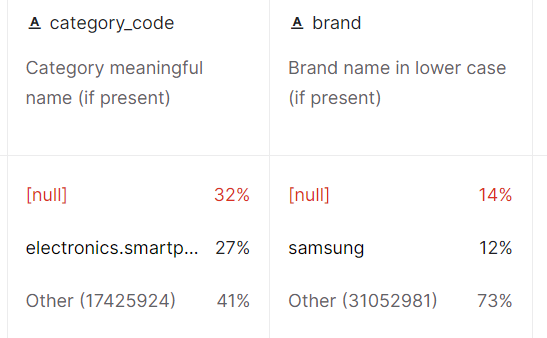

'전자제품이 중심인 파는 e커머스인가?' 생각해보았음

결측치

In [ ]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    3224119
brand            1388005
price                  0
user_id                0
user_session           1
dtype: int64

# **결측치 분석**

In [ ]:
!pip install category_encoders        ## 인코더 설치
!pip install pandas-profiling==3.1.0  ## 판다스 프로파일링 설치

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 7.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 25.1 MB/s 
     |████████████████████████████████| 303 kB 82.4 MB/s 
     |████████████████████████████████| 102 kB 15.9 MB/s 
     |████████████████████████████████| 3.1 MB 54.9 MB/s 
     |████████████████████████████████| 690 kB 80.0 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 296 kB 64.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=34aae50379b3a4d3c42b12f58384b550927cceff9fc59eb22446f30532fb7895
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing insta

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

category_code(상품코드)가 결측치이고, price(가격)이 0인 것은 제거해야 할 듯함 

category_code(상품코드)가 결측치이고, brand(브랜드)가 결측치인 것은 제거해야 할 듯함 (완료)

왜냐하면, 정체를 알 수 없는 품목이기 때문에

In [ ]:
# 카테고리 코드와 브랜드 둘다 결측치 일경우 삭제

df = df.dropna(subset=['category_code', 'brand'], how='all')

In [ ]:
df1= df[df['event_type']== 'purchase']

In [ ]:
df1['category_code'].value_counts().tail(10)

apparel.shoes.slipons         3
apparel.scarf                 2
apparel.sock                  2
apparel.belt                  2
sport.ski                     2
auto.accessories.winch        2
apparel.shorts                2
apparel.shoes.sandals         2
apparel.skirt                 1
apparel.shoes.ballet_shoes    1
Name: category_code, dtype: int64

In [ ]:
df[df['price']== 0] # 가격이 0인 행

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
2600,2019-10-01 02:22:31+00:00,view,7000684,2053013560346280633,kids.carriage,NaN,0.0,555462472,c378efe2-75b4-48fa-96ec-bce2ab05d7fc
9971,2019-10-01 02:37:16+00:00,view,1003507,2053013555631882655,electronics.smartphone,NaN,0.0,532323530,af0b8bbc-5792-4f89-a9ea-82d0503b9891
12977,2019-10-01 02:42:28+00:00,view,10200661,2053013553224352013,kids.dolls,NaN,0.0,548417642,bbd7b93c-2d5e-4061-acd1-477a7bb18727
19452,2019-10-01 02:53:07+00:00,view,12202735,2116907525176557699,sport.bicycle,NaN,0.0,539443846,a47853d8-71cf-4ead-a923-c04c34b6c024
22173,2019-10-01 02:57:15+00:00,view,10201566,2053013553224352013,kids.dolls,NaN,0.0,541099963,1c644248-183d-4ab6-9a13-eea2fc0f5ee4
...,...,...,...,...,...,...,...,...,...
9999392,2019-10-08 17:25:45+00:00,view,4804592,2053013554658804075,electronics.audio.headphone,NaN,0.0,516859149,3c64e724-181c-4fbd-bce3-8cdaf3575336
9999415,2019-10-08 17:25:46+00:00,view,6200927,2053013552293216471,appliances.environment.air_heater,NaN,0.0,514447196,4c4125c8-5f34-4bb6-879e-aad4c7d14126
9999471,2019-10-08 17:25:48+00:00,view,1005206,2053013555631882655,electronics.smartphone,NaN,0.0,542359484,959ce1b5-bd8f-4b41-b516-fc901a259483
9999618,2019-10-08 17:25:55+00:00,view,1005206,2053013555631882655,electronics.smartphone,NaN,0.0,542359484,959ce1b5-bd8f-4b41-b516-fc901a259483


In [ ]:
# 가격이 0인행 삭제
index1 =df[df['price'] == 0].index 
df = df.drop(index1)
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,NaN,shiseido,35.790001,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.200001,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.099976,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.740005,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.979980,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
9999993,2019-10-08 17:26:09+00:00,view,22700129,2053013556168753601,NaN,stels,66.930000,557810986,f4a730c0-c21d-4b7d-8be1-060f320f183c
9999995,2019-10-08 17:26:09+00:00,view,22900082,2053013561780732677,furniture.bedroom.pillow,belashoff,25.740000,518471106,708497d0-bed7-476b-af47-66ebda1d6c68
9999997,2019-10-08 17:26:09+00:00,view,26400265,2053013563651392361,NaN,lucente,154.190002,547749418,e22d0270-8dea-4cc1-ae99-e78a581f515e
9999998,2019-10-08 17:26:09+00:00,view,1005125,2053013555631882655,electronics.smartphone,apple,1955.010010,555334348,28b16eb3-1362-4806-8f4f-0265c7afe096


In [ ]:
# 유저섹션 2개 결측치제거
df = df.dropna(subset = ['user_session'], how = 'any', axis=0)
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,NaN,shiseido,35.790001,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.200001,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.099976,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.740005,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.979980,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
9999993,2019-10-08 17:26:09+00:00,view,22700129,2053013556168753601,NaN,stels,66.930000,557810986,f4a730c0-c21d-4b7d-8be1-060f320f183c
9999995,2019-10-08 17:26:09+00:00,view,22900082,2053013561780732677,furniture.bedroom.pillow,belashoff,25.740000,518471106,708497d0-bed7-476b-af47-66ebda1d6c68
9999997,2019-10-08 17:26:09+00:00,view,26400265,2053013563651392361,NaN,lucente,154.190002,547749418,e22d0270-8dea-4cc1-ae99-e78a581f515e
9999998,2019-10-08 17:26:09+00:00,view,1005125,2053013555631882655,electronics.smartphone,apple,1955.010010,555334348,28b16eb3-1362-4806-8f4f-0265c7afe096


In [ ]:
# brand 결측치 unknown으로 대체
df.loc[df['brand'] != df['brand'], 'brand'] = 'unknown' # 이 코드도 사용 가능함

#df['brand'] = df['brand'].fillna('unknown')
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


event_time             0
event_type             0
product_id             0
category_id            0
category_code    2351937
brand                  0
price                  0
user_id                0
user_session           0
dtype: int64

In [ ]:
# category_code 결측치를 unknown으로 대체
df.loc[df['category_code'] != df['category_code'], 'category_code'] = 'unknown.unknown.unknown' # 이 코드도 사용 가능함

#df['category_code'] = df['category_code'].fillna('unknown.unknown.unknown')
df.isna().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

# **대분류 중분류 소분류 나누기**

In [ ]:
spl = df.category_code.str.split('.')
spl

0                      [unknown, unknown, unknown]
1          [appliances, environment, water_heater]
2                   [furniture, living_room, sofa]
3                            [computers, notebook]
4                        [electronics, smartphone]
                            ...                   
9999993                [unknown, unknown, unknown]
9999995               [furniture, bedroom, pillow]
9999997                [unknown, unknown, unknown]
9999998                  [electronics, smartphone]
9999999                      [accessories, wallet]
Name: category_code, Length: 9120419, dtype: object

In [ ]:
df.loc[:, 'division1'] = spl.str[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
df.loc[:, 'division2'] = spl.str[1]

In [ ]:
df.loc[:, 'division3'] = spl.str[2]

In [ ]:
df.loc[df['division3'] != df['division3'], 'division3'] = df.loc[df['division3'] != df['division3'], 'division2']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,division1,division2,division3
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,unknown.unknown.unknown,shiseido,35.790001,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,unknown,unknown,unknown
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.200001,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,appliances,environment,water_heater
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,unknown,543.099976,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,furniture,living_room,sofa
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.740005,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,computers,notebook,notebook
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.979980,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,electronics,smartphone,smartphone
...,...,...,...,...,...,...,...,...,...,...,...,...
9999993,2019-10-08 17:26:09+00:00,view,22700129,2053013556168753601,unknown.unknown.unknown,stels,66.930000,557810986,f4a730c0-c21d-4b7d-8be1-060f320f183c,unknown,unknown,unknown
9999995,2019-10-08 17:26:09+00:00,view,22900082,2053013561780732677,furniture.bedroom.pillow,belashoff,25.740000,518471106,708497d0-bed7-476b-af47-66ebda1d6c68,furniture,bedroom,pillow
9999997,2019-10-08 17:26:09+00:00,view,26400265,2053013563651392361,unknown.unknown.unknown,lucente,154.190002,547749418,e22d0270-8dea-4cc1-ae99-e78a581f515e,unknown,unknown,unknown
9999998,2019-10-08 17:26:09+00:00,view,1005125,2053013555631882655,electronics.smartphone,apple,1955.010010,555334348,28b16eb3-1362-4806-8f4f-0265c7afe096,electronics,smartphone,smartphone


# **대분류, 중분류 항목수 파악**

In [ ]:
df['division1'].value_counts().sort_index()

accessories       52479
apparel          242748
appliances      1169472
auto             324862
computers        563862
construction     163380
country_yard       3926
electronics     3855077
furniture        227911
kids             117889
medicine           2463
sport             42879
stationery         1534
unknown         2351937
Name: division1, dtype: int64

In [ ]:
df[['division1','division2']].groupby('division1')['division2'].value_counts().to_frame()

division2
division1    division2                
accessories  bag                 42134
             wallet               9328
             umbrella             1017
apparel      shoes              198648
             underwear            9708
             costume              7858
             tshirt               6774
             jeans                6145
             trousers             5197
             dress                3695
             shirt                2501
             sock                  699
             scarf                 564
             belt                  447
             skirt                 302
             shorts                175
             jacket                 35
appliances   kitchen            764470
             environment        290573
             iron                39971
             sewing_machine      33422
             personal            32643
             ironing_board        8393
auto         accessories        324862
computers    notebook           288826
             desktop             95080
             peripherals         92730
             components          80758
             ebooks               6468
construction tools              157448
             components           5932
country_yard cultivator           1913
             lawn_mower           1563
             furniture             450
electronics  smartphone        2743223
             audio              400277
             clocks             335809
             video              232638
             tablet              72107
             telephone           58913
             camera              12110
furniture    living_room        104833
             bedroom             75319
             kitchen             37467
             bathroom             7282
             universal            3010
kids         carriage            51930
             skates              23615
             toys                21265
             dolls                8112
             swing                7340
             fmcg                 5627
medicine     tools                2463
sport        bicycle             34577
             trainer              5892
             tennis                890
             snowboard             853
             ski                   667
stationery   cartrige             1534
unknown      unknown           2351937

In [ ]:
df[df['division2'] == 'bag']

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,division1,division2,division3
954,2019-10-01 00:16:16+00:00,view,28401058,2053013566209917945,accessories.bag,karya,100.389999,547093079,6619868d-16c8-401d-8cdf-ca758c006ebc,accessories,bag,bag
1379,2019-10-01 02:18:18+00:00,view,32900083,2055156924407612189,accessories.bag,a-elita,8.490000,549437633,62760980-f427-42e0-a891-8b590fd54584,accessories,bag,bag
1611,2019-10-01 02:19:25+00:00,view,28400775,2053013566209917945,accessories.bag,baden,61.520000,534493194,f76aa6b4-a676-4fd5-94c9-722802417b8e,accessories,bag,bag
2452,2019-10-01 02:22:08+00:00,view,28400775,2053013566209917945,accessories.bag,baden,61.520000,522764023,7a85303b-d558-4953-b218-d20850e5263a,accessories,bag,bag
2857,2019-10-01 02:23:14+00:00,view,28400820,2053013566209917945,accessories.bag,coccinelle,265.640015,513347976,1612872d-029c-44ad-989d-92758f79dfd1,accessories,bag,bag
...,...,...,...,...,...,...,...,...,...,...,...,...
9999371,2019-10-08 17:25:44+00:00,view,28400799,2053013566209917945,accessories.bag,baden,61.520000,518519702,13a83bf4-72e7-4da5-8383-249f876cec42,accessories,bag,bag
9999642,2019-10-08 17:25:55+00:00,view,28401057,2053013566209917945,accessories.bag,karya,100.389999,531030768,344a8572-3710-42c0-9e39-47193c9778b7,accessories,bag,bag
9999671,2019-10-08 17:25:57+00:00,view,32900032,2055156924407612189,accessories.bag,unknown,117.160004,551030374,b261cd06-0bd7-430f-916a-579538bd35f6,accessories,bag,bag
9999826,2019-10-08 17:26:02+00:00,view,49800017,2126679654801604876,accessories.bag,ritmix,12.320000,512554308,3f429970-a2b5-46ca-bfbb-6a3749fdc56b,accessories,bag,bag


In [ ]:
df[['division1','division2','division3']].groupby('division1')['division2'].value_counts().to_frame()

division2
division1    division2                
accessories  bag                 42134
             wallet               9328
             umbrella             1017
apparel      shoes              198648
             underwear            9708
             costume              7858
             tshirt               6774
             jeans                6145
             trousers             5197
             dress                3695
             shirt                2501
             sock                  699
             scarf                 564
             belt                  447
             skirt                 302
             shorts                175
             jacket                 35
appliances   kitchen            764470
             environment        290573
             iron                39971
             sewing_machine      33422
             personal            32643
             ironing_board        8393
auto         accessories        324862
computers    notebook           288826
             desktop             95080
             peripherals         92730
             components          80758
             ebooks               6468
construction tools              157448
             components           5932
country_yard cultivator           1913
             lawn_mower           1563
             furniture             450
electronics  smartphone        2743223
             audio              400277
             clocks             335809
             video              232638
             tablet              72107
             telephone           58913
             camera              12110
furniture    living_room        104833
             bedroom             75319
             kitchen             37467
             bathroom             7282
             universal            3010
kids         carriage            51930
             skates              23615
             toys                21265
             dolls                8112
             swing                7340
             fmcg                 5627
medicine     tools                2463
sport        bicycle             34577
             trainer              5892
             tennis                890
             snowboard             853
             ski                   667
stationery   cartrige             1534
unknown      unknown           2351937